In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import skfuzzy as fuzz

In [2]:
df = pd.read_csv("C:/Users/Otinwa Ayomide/Downloads/ML project/archive (10)/Credit Card Customer Data.csv")
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [3]:
df.shape

(660, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


In [6]:
df.drop("Sl_No", axis = 1, inplace = True)

In [7]:
df.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,87073,100000,2,1,1,0
1,38414,50000,3,0,10,9
2,17341,50000,7,1,3,4
3,40496,30000,5,1,1,4
4,47437,100000,6,0,12,3


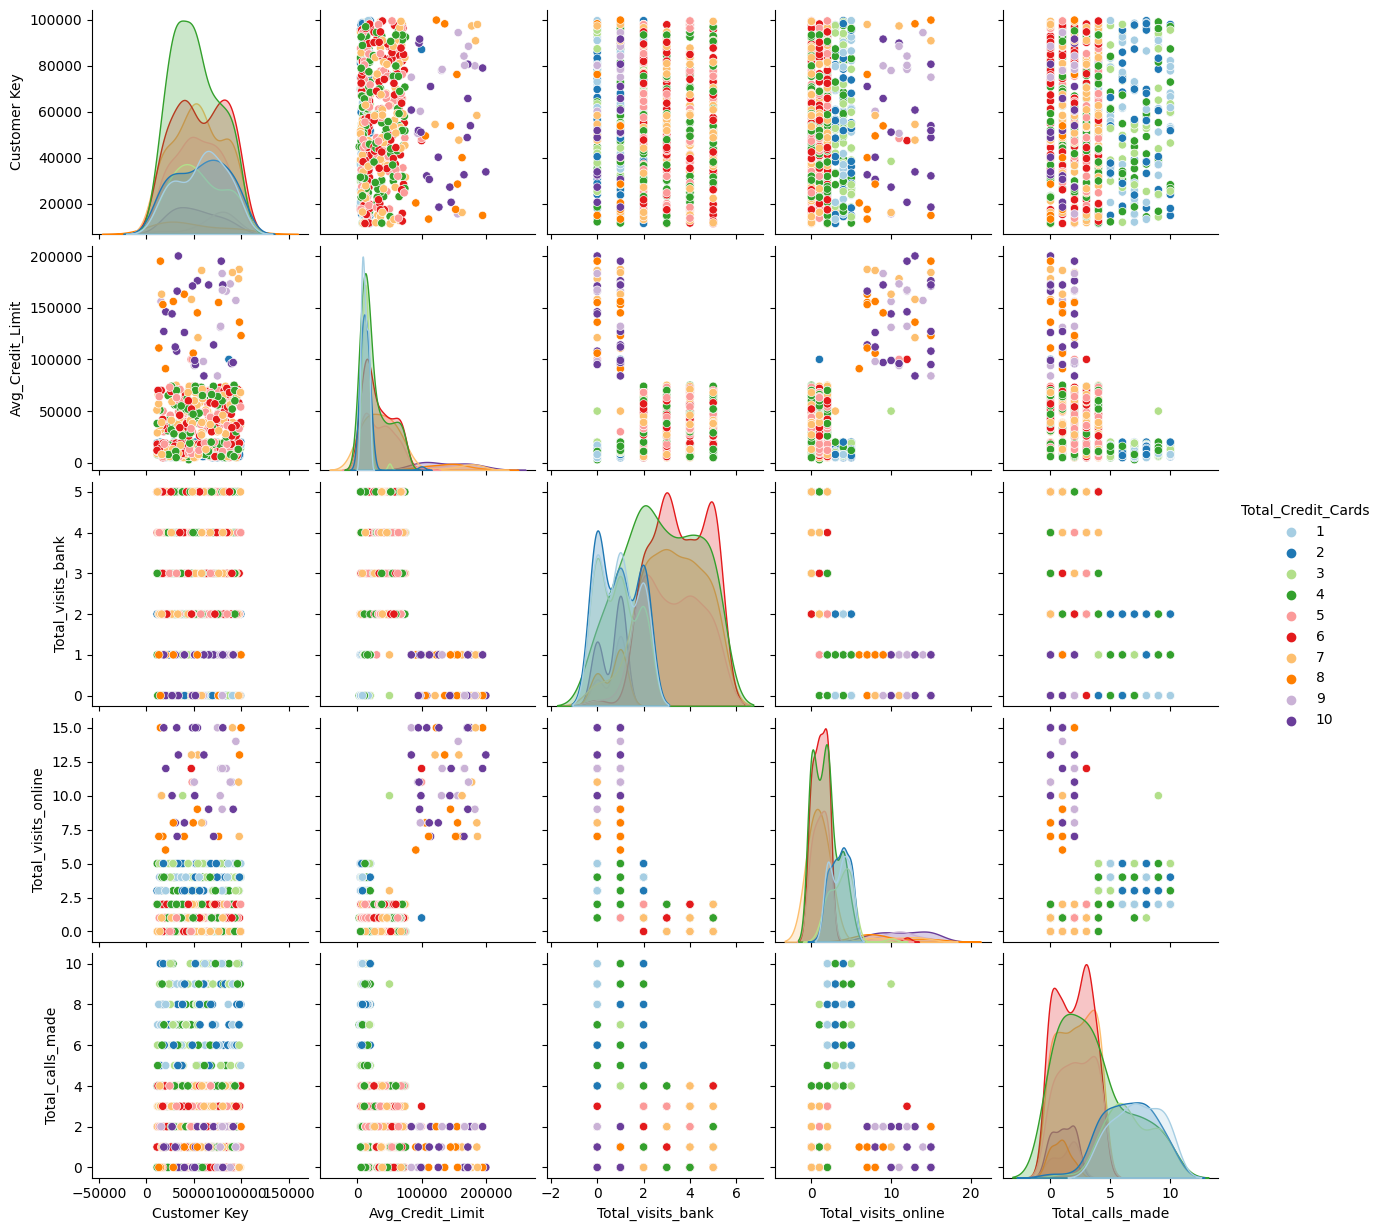

In [8]:
sns.pairplot(df, hue = "Total_Credit_Cards", palette="Paired")
plt.show()

In [9]:
df.drop("Customer Key", axis = 1, inplace = True)

In [10]:
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


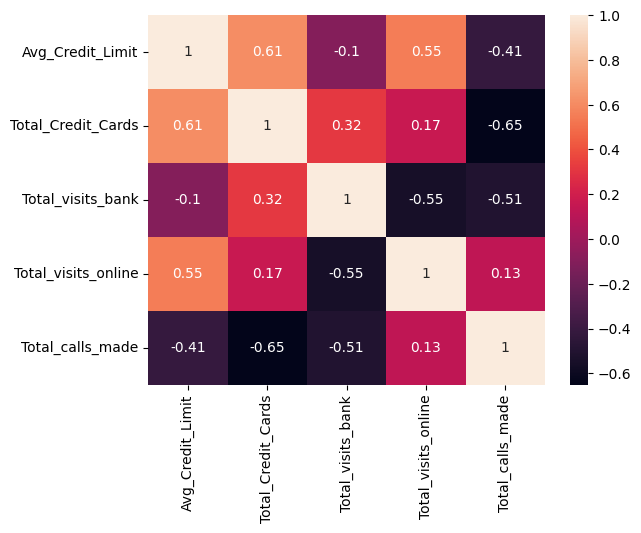

In [11]:
corr = df.corr()

sns.heatmap(corr, annot = True)
plt.show()

In [12]:
standard = StandardScaler()
x = standard.fit_transform(df)

In [13]:
x

array([[ 1.74018685, -1.24922476, -0.86045063, -0.54748969, -1.25153737],
       [ 0.41029254, -0.78758515, -1.47373077,  2.5205186 ,  1.89185881],
       [ 0.41029254,  1.05897329, -0.86045063,  0.13428993,  0.1455276 ],
       ...,
       [ 2.93709172,  1.5206129 , -0.86045063,  2.17962879, -0.90227113],
       [ 3.65523464,  2.44389211, -0.86045063,  4.22496765, -1.25153737],
       [ 3.52224521,  1.9822525 , -1.47373077,  3.20229822, -0.55300488]])

# KMeans clustering

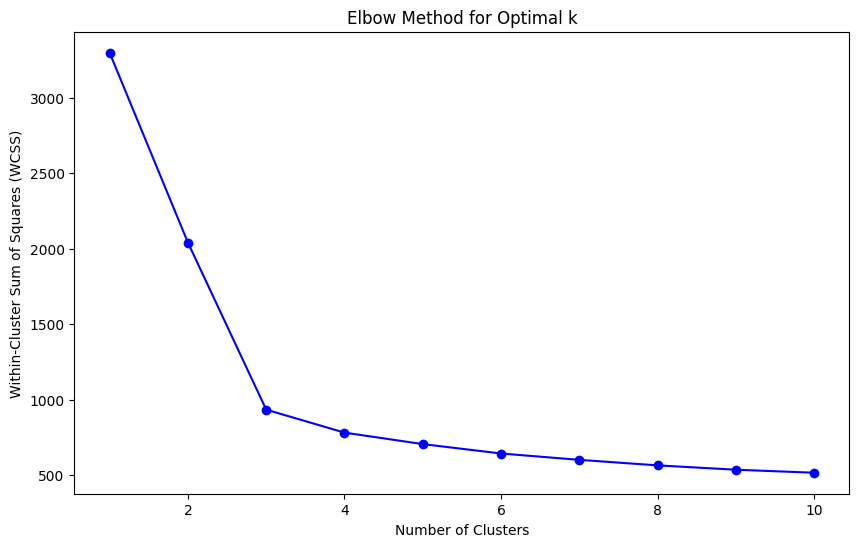

In [14]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()

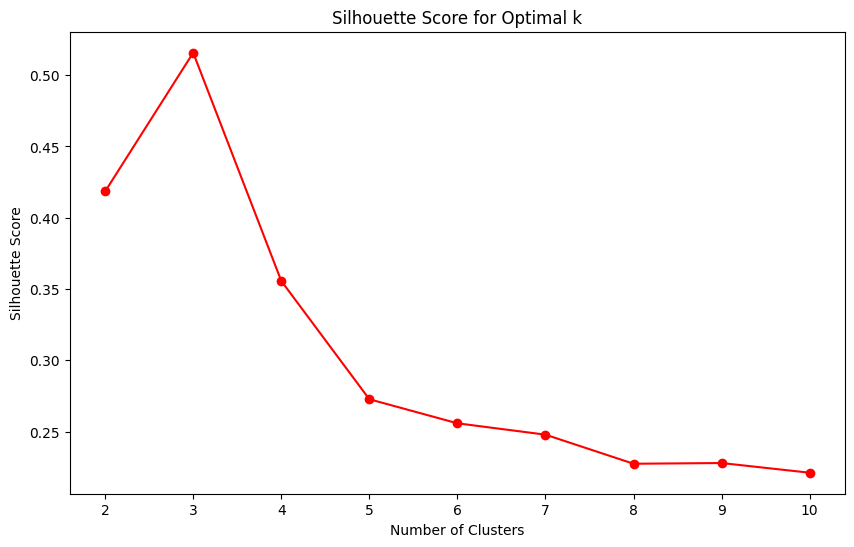

In [15]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(x)
    score = silhouette_score(x, cluster_labels)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='r')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

In [16]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit_predict(x)
df["k_clusters"] = kmeans.labels_

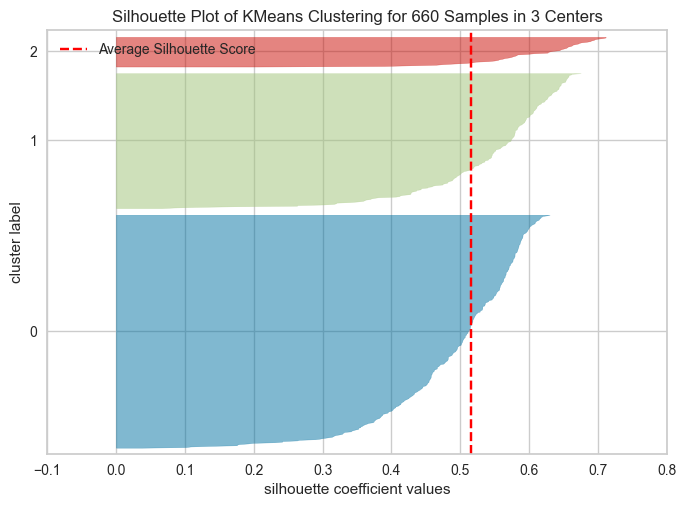

In [17]:
from yellowbrick.cluster import SilhouetteVisualizer
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(x)
visualizer.show()
plt.show()

In [18]:
silhouette_avg = silhouette_score(x, df["k_clusters"])
print(f"Silhouette Coefficient: {silhouette_avg}")

Silhouette Coefficient: 0.5157182558881063


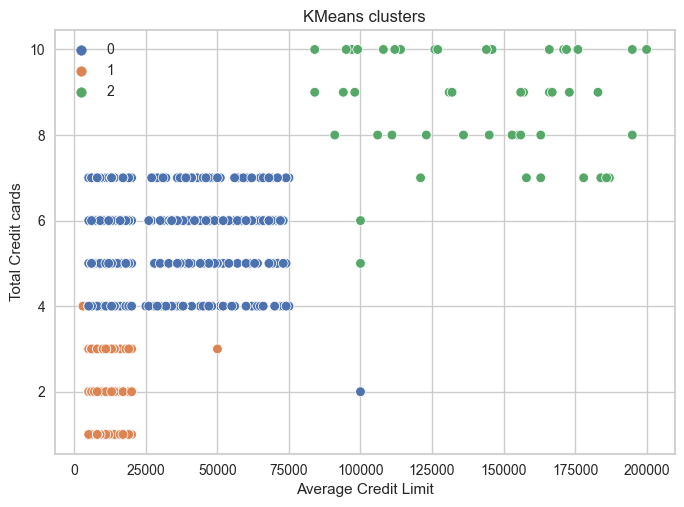

In [19]:
sns.scatterplot(x = df["Avg_Credit_Limit"], y = df["Total_Credit_Cards"], hue = df["k_clusters"], palette="deep")
plt.title("KMeans clusters")
plt.xlabel("Average Credit Limit")
plt.ylabel("Total Credit cards")
plt.legend()
plt.show()

# Hierarchial CLUSTERING


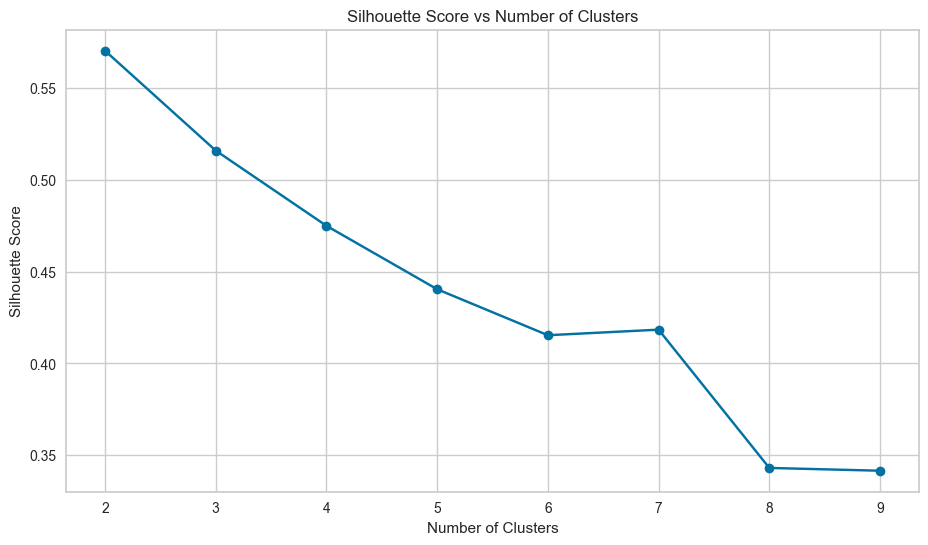

In [20]:
Agg_silhouette_scores = []

for n_clusters in range(2,10):
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
    labels = agg_clustering.fit_predict(x)
    sil_score = silhouette_score(x, labels)
    Agg_silhouette_scores.append(sil_score)

# Plot silhouette scores
plt.figure(figsize=(11, 6))
plt.plot(range(2,10), Agg_silhouette_scores, marker='o', linestyle='-')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

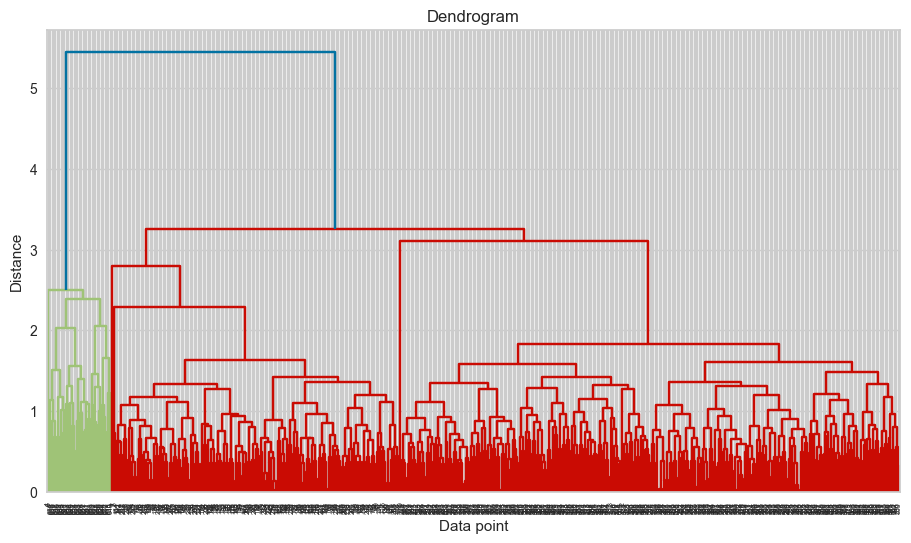

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(x, 'average')

plt.figure(figsize=(11, 6))
plt.title('Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.show()

In [22]:
agglom = AgglomerativeClustering(n_clusters=2, linkage='average').fit(x)

df['Agg_Labels'] = agglom.labels_

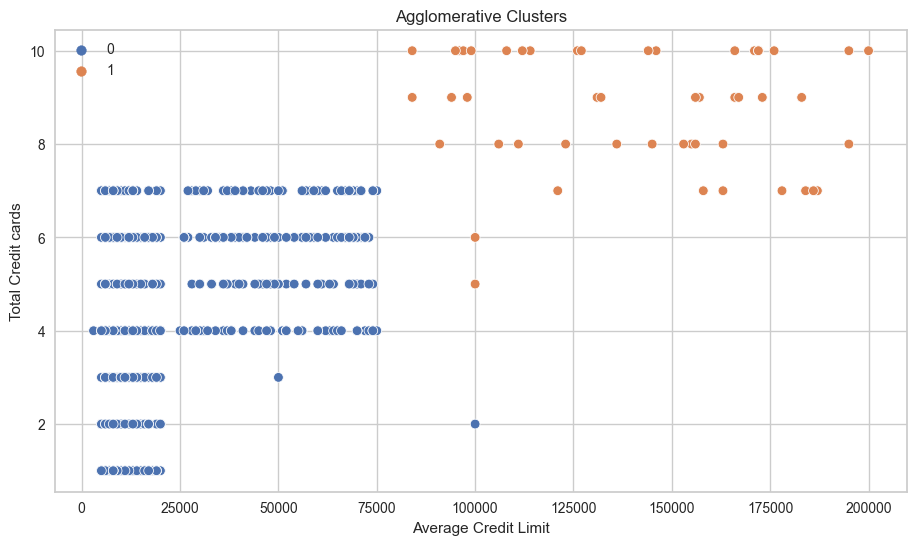

In [23]:

plt.figure(figsize=(11, 6))
sns.scatterplot(x = df["Avg_Credit_Limit"], y = df["Total_Credit_Cards"], hue=df['Agg_Labels'], palette = "deep")
plt.title('Agglomerative Clusters')
plt.xlabel("Average Credit Limit")
plt.ylabel("Total Credit cards")
plt.legend()

plt.show()

In [24]:
Agg_sil_score = silhouette_score(x, df["Agg_Labels"])

print(f"Silhouette Score for Agglomerative Clustering: {Agg_sil_score}")

Silhouette Score for Agglomerative Clustering: 0.5703183487340514


# DBscan clustering

In [25]:
eps_range = np.arange(0.1, 2.0, 0.1) 
min_samples_range = np.arange(3,20, 1) 

best_score = -1
best_params = {}

for eps in eps_range:
    for min_samples in min_samples_range:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(x)
        if len(set(labels)) > 1:
            score = silhouette_score(x, labels)
            if score > best_score:
                best_score = score
                best_params = {'eps': eps, 'min_samples': min_samples}

print(f"Best Silhouette Score: {best_score}")
print(f"Optimal Parameters: {best_params}")

Best Silhouette Score: 0.5631309298756517
Optimal Parameters: {'eps': 1.2000000000000002, 'min_samples': 16}


In [26]:
dbscan = DBSCAN(eps=1.2, min_samples=16)
df["db_label"] = dbscan.fit_predict(x)

In [27]:
df["db_label"]

0     -1
1     -1
2      0
3      0
4     -1
      ..
655   -1
656   -1
657   -1
658   -1
659   -1
Name: db_label, Length: 660, dtype: int64

In [28]:
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,k_clusters,Agg_Labels,db_label
0,100000,2,1,1,0,0,0,-1
1,50000,3,0,10,9,1,0,-1
2,50000,7,1,3,4,0,0,0
3,30000,5,1,1,4,0,0,0
4,100000,6,0,12,3,2,1,-1


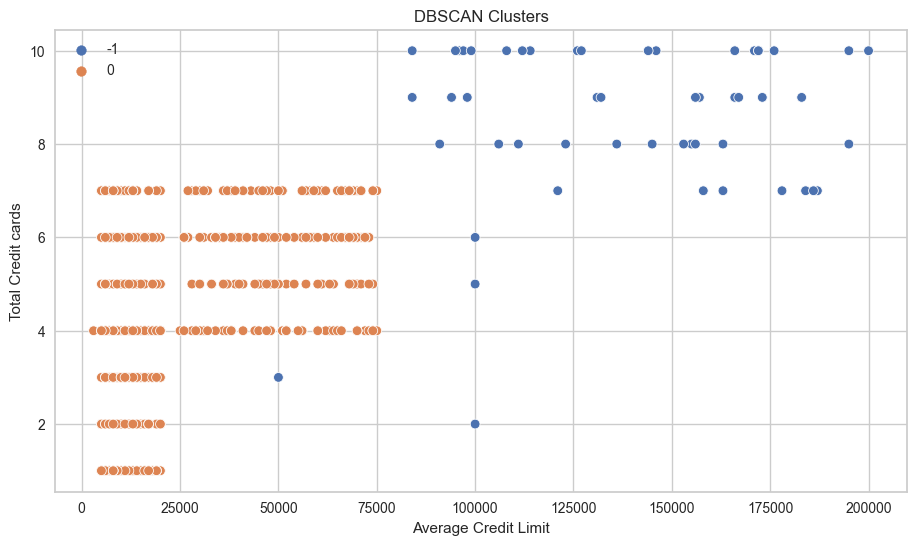

In [29]:
plt.figure(figsize=(11, 6))
sns.scatterplot(x = df["Avg_Credit_Limit"], y = df["Total_Credit_Cards"], hue=df['db_label'], palette = "deep")
plt.title('DBSCAN Clusters')
plt.xlabel("Average Credit Limit")
plt.ylabel("Total Credit cards")
plt.legend()
plt.show()

# Fuzzy Means Clustering

In [30]:
x_t = x.T

In [31]:
fpc_values = []
silhouette_scores_fuzzy = []

for n_clusters in range(2, 10):
    # Perform Fuzzy C-Means
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        x.T, c=n_clusters, m=2.0, error=0.005, maxiter=1000
    )
    fpc_values.append(fpc)

    # Compute crisp labels and Silhouette Score
    labels = np.argmax(u, axis=0)
    silhouette_scores_fuzzy.append(silhouette_score(x, labels))


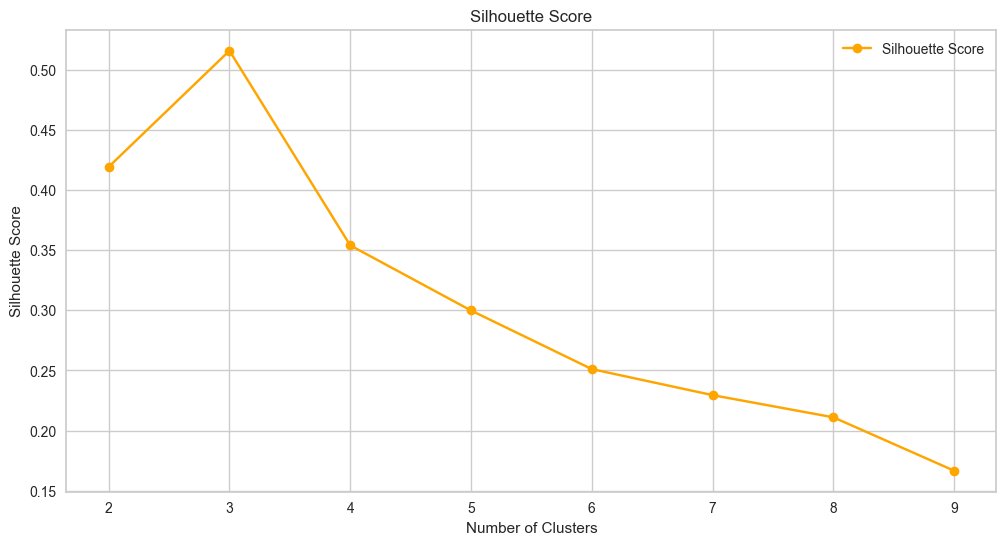

In [32]:
plt.figure(figsize=(12, 6))

# Plot Silhouette Scores
plt.plot(range(2, 10), silhouette_scores_fuzzy, 'o-', label='Silhouette Score', color='orange')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()


In [33]:
cntr, u, _, _, _, _, fpc = fuzz.cluster.cmeans(
    x.T, c=3, m=2.0, error=0.005, maxiter=1000
)

df["fuzz_labels"] = np.argmax(u, axis=0)

In [34]:
fuzz_sil_score = silhouette_score(x, df["fuzz_labels"])

print(f"Silhouette Score for fuzzy Clustering: {fuzz_sil_score}")

Silhouette Score for fuzzy Clustering: 0.5157182558881063


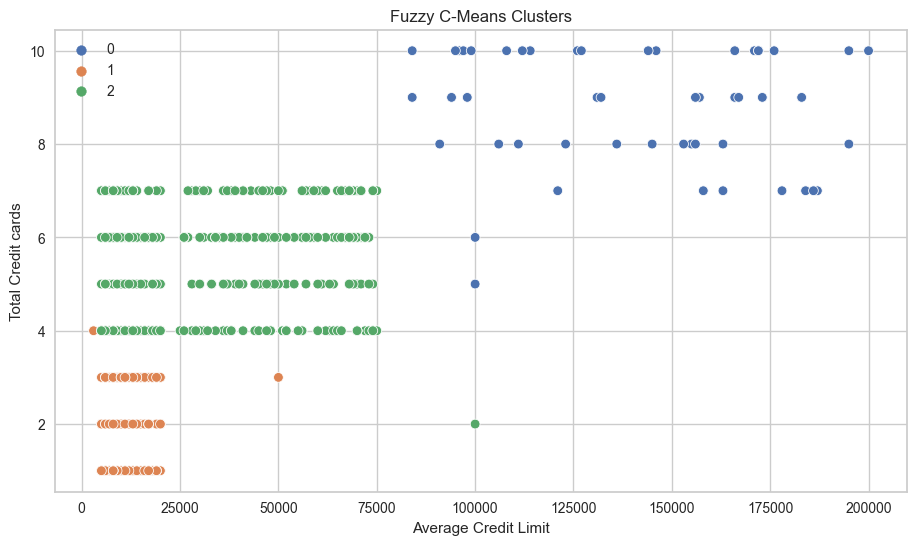

In [35]:
plt.figure(figsize=(11, 6))
sns.scatterplot(x = df["Avg_Credit_Limit"], y = df["Total_Credit_Cards"], hue=df["fuzz_labels"], palette= "deep")
plt.title('Fuzzy C-Means Clusters')
plt.xlabel("Average Credit Limit")
plt.ylabel("Total Credit cards")
plt.legend()
plt.show()